# MOVIE RECOMMENDER SYSTEM

Data Source: TMDB 5000 movies dataset from Kaggle.

#### About the data:

There are two CSV files:

###### 1) Credits_csv

    contains 4 columns:
    
    movie_id - unique id of the movie
    title - name of the movie
    cast - a list of dictionaries containing information about all the cast members of the movie
    crew - a list of dictionaries containing information about all the crew members of the movie
    
###### 2) movies_csv

    contains 20 columns:
    
    budget - The budget in which the movie was made
    genre - The genre of the movie, Action, Comedy ,Thriller etc. A movie can belong to multiple genres.
    homepage - The official web page of the movie
    id - Unique identifier of the movie
    keywords - list of keywords used to decribe the movie
    original_language - The language in which the movie was shot
    original_title - The title of the movie
    overview - short overview of the movie
    popularity - How popular the movie was among users
    production_companies - Companies involved in producing the movie
    production_countries - Countries in which the movie was produced
    release_date - Releasing date of the movie
    revenue - Revenue generated by the movie
    runtime - Runtime of the movie
    spoken_languages - Languages in which the movie was released in
    status - status of the movie : released / rumoured / Post production (all the movies in this data are released)
    tagline - Tagline of the movie
    title - same as original title, different if the name of the movie was changed later
    vote_average - average rating of the movie by users
    vote_count - count of votes the movie received by users
    
    

Since this dataset only contains info about the movies and not users, collaborative filtering is excluded.

In [1]:
#importing all the necessary libraries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from ast import literal_eval

In [2]:
data1 = pd.read_csv("D:/tmdb/tmdb_5000_credits.csv")
data2 = pd.read_csv("D:/tmdb/tmdb_5000_movies.csv")

In [3]:
data1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
data2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
data1.shape

(4803, 4)

In [6]:
data2.shape

(4803, 20)

##### Credits data has 4803 rows and 4 columns
##### Movies data has 4803 rows and 20 columns

In [7]:
data1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [8]:
data2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

We see that the credits data and movies data both have a movie_id column but they're named differently. So we will rename one of them so that it's easier for us when we merge the two dataframes based on the movie_id.

In [9]:
data1.rename(columns={'movie_id': 'id'},inplace=True)
data1.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Analysis of data

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4803 non-null   int64 
 1   title   4803 non-null   object
 2   cast    4803 non-null   object
 3   crew    4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


##### Credits data has no missing values

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [12]:
data2.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

##### Movies data has missing values

We see that in the homepage column, over 60% of the data is missing. Upon looking at the homepage col, we can see that it's a link to the movie's official webpage. The presence or absence of a website is really not of much use to us in building a recommendation system and since so much data is missing, we can drop that column.

In [13]:
data2.drop('homepage',axis = 1, inplace = True)
data2.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
data2.isna().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title                     0
vote_average              0
vote_count                0
dtype: int64

There seems to be just 1 row with missing release date value. Let's take a look at that row to see if it has any other valuable information or if we can drop it.

In [15]:
data2[data2.release_date.isna()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


##### We see that this row is missing a lot of other values as well.

So it's safe to drop this row before further analysis.

In [16]:
data2.drop(index = 4553, axis = 0, inplace = True)
data2[data2.release_date.isna()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [17]:
data2.reset_index(drop=True, inplace=True)
data2.shape

(4802, 19)

In [18]:
data2.isna().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 843
title                     0
vote_average              0
vote_count                0
dtype: int64

We can't really manually impute values in the tagline column so we will simply not use that variable in our recommendation system.

In [19]:
data2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000
mean,2.905109e+07,57098.234902,21.496776,8.227777e+07,106.898125,6.093440,690.361724
std,4.072447e+07,88581.302370,31.818451,1.628697e+08,22.561593,1.191496,1234.674268
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9013.750000,4.671734,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14626.500000,12.924931,1.917498e+07,103.000000,6.200000,235.500000
75%,4.000000e+07,58589.750000,28.332017,9.291920e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


##### Correlation between the numerical values:

In [20]:
data2.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.088963,0.505364,0.730806,0.269792,0.092644,0.593148
id,-0.088963,1.000000,0.031760,-0.050113,-0.150497,-0.267822,-0.003710
popularity,0.505364,0.031760,1.000000,0.644700,0.225372,0.273990,0.778114
revenue,0.730806,-0.050113,0.644700,1.000000,0.251188,0.197153,0.781475
runtime,0.269792,-0.150497,0.225372,0.251188,1.000000,0.371888,0.272036
vote_average,0.092644,-0.267822,0.273990,0.197153,0.371888,1.000000,0.313263
vote_count,0.593148,-0.003710,0.778114,0.781475,0.272036,0.313263,1.000000


<AxesSubplot:>

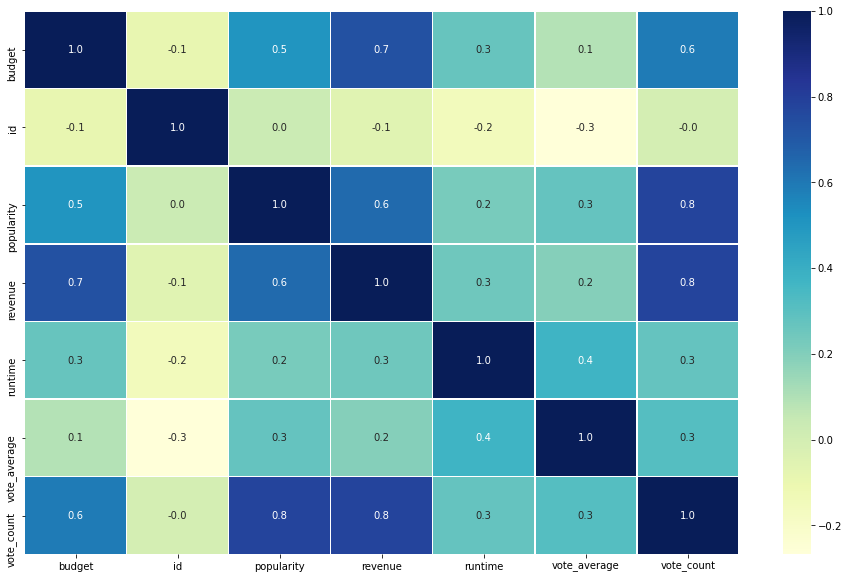

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(data2.corr(), annot=True, linewidths=.5, fmt= '.1f', cmap="YlGnBu")

##### Interpreting correlation heatmap:

We see that vote_count has a high correlation with popularity, revenue and budget.
Popularity has a high correlation with budget, revenue.
Revenue has a high correlation with budget.

We can safely say that a movie with a high budget was likely to be more popular, hence more watched and received more votes and hence generated high revenue.

Text(0.5, 1.0, 'Budget Revenue Scatter Plot')

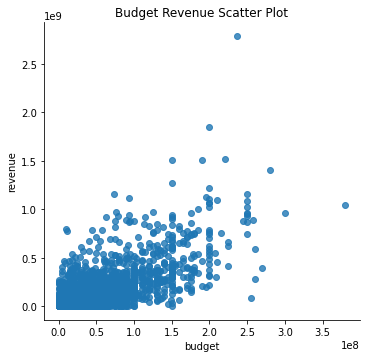

In [22]:
# Scatter Plot 
sns.lmplot(x ='budget', y = 'revenue', data = data2, fit_reg = False)
plt.title('Budget Revenue Scatter Plot')

##### Exploring budget

<AxesSubplot:xlabel='budget', ylabel='Count'>

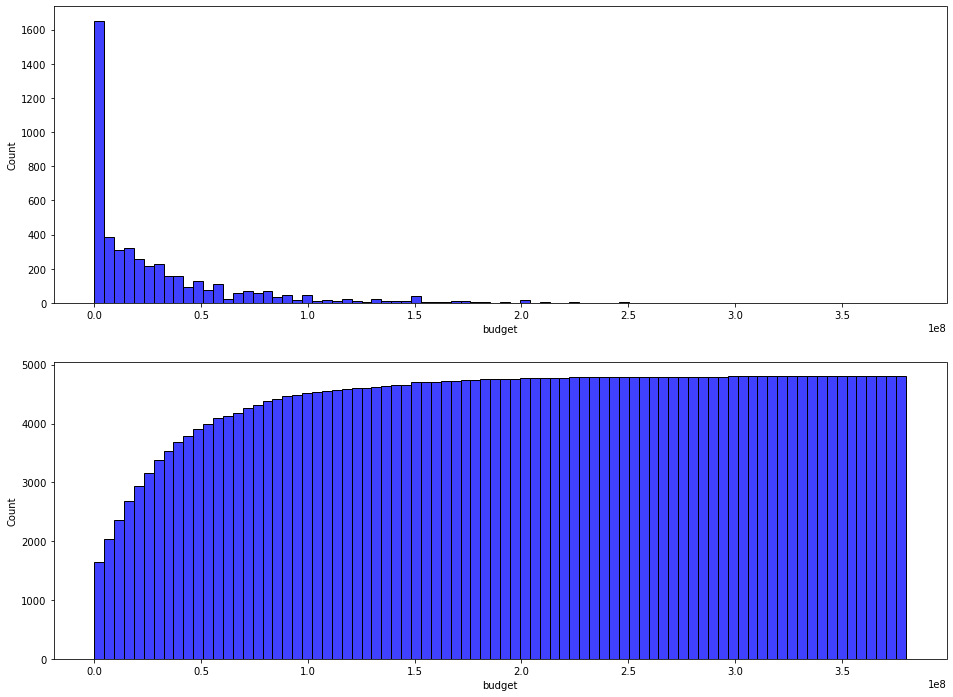

In [23]:
#Histogram of budget
fig, axes = plt.subplots(2, 1, figsize = (16,12))
sns.histplot(data = data2, x = 'budget', color = 'blue', cumulative = False, ax = axes[0])
sns.histplot(data = data2, x = 'budget', color = 'blue', cumulative = True, ax = axes[1])


We can see that most movies in the dataset are at the lower end of the budget with very few exceptions.

In [24]:
len(data2[data2.budget > 200000000])

27

In [25]:
len(data2[data2.budget > 100000000])

279

Only 279 movies (out of 4802) have been made with budget higher than one hundred million and out of that, 27 movies were made with budget higher than two hundred million.

In [26]:
len(data2[data2.budget < 10000000])

2048

In [27]:
print(len(data2[data2.budget < 10000000])/len(data2) * 100)
print(len(data2[data2.budget < 50000000])/len(data2) * 100)

42.648896293211166
79.36276551436902


About 42% of the movies in the dataset were made with less than 10 million and 79% of the movies were made in less than 50 million dollars

##### Exploring popularity

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

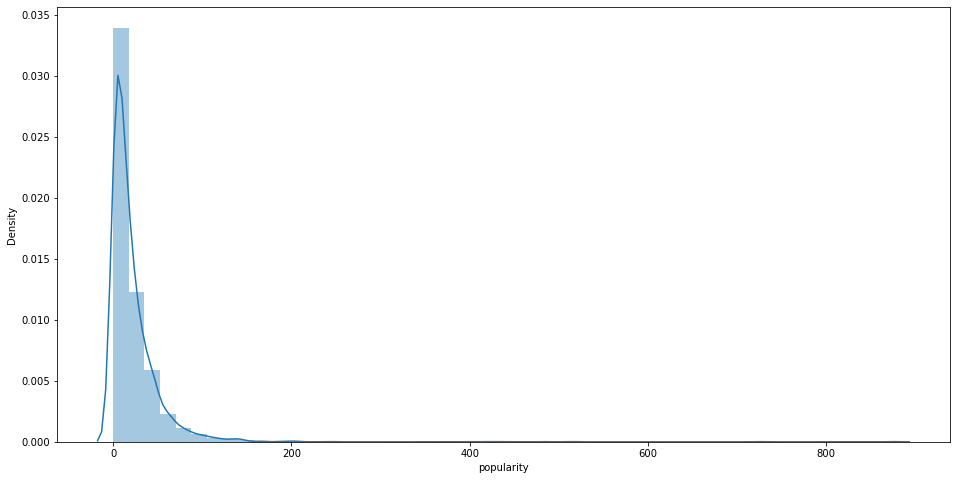

In [28]:
plt.figure(figsize=(16,8))
sns.distplot(data2.popularity)

In [29]:
len(data2[data2['popularity']>200])

11

There are only 11 movies with popularity score higher than 200 even though the maximum score goes up till 800.

##### Movies by release year

Let us visualise the number of movies that have been released each year.

In [30]:
data2.release_date

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4797    1992-09-04
4798    2011-12-26
4799    2013-10-13
4800    2012-05-03
4801    2005-08-05
Name: release_date, Length: 4802, dtype: object

We see that the values are string type. We will use the split method to extract the year from the release date strings.

In [31]:
data2['release_year'] = 0
for i in range(len(data2)):
    data2.release_year[i] = int(data2['release_date'][i].split('-')[0])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
data2.release_year.value_counts()

2009    247
2014    238
2006    237
2013    231
2008    227
       ... 
1930      1
1934      1
1950      1
1958      1
1916      1
Name: release_year, Length: 90, dtype: int64

There are 90 unique values (years) i.e the movies span over a range of 90 years, almost a century. This will be difficult to vizualise so let's narrow it down further by considering the decade instead of the year.

##### Movies by decade

In [33]:
data2['release_year'].describe()

count    4802.000000
mean     2002.468763
std        12.414354
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64

##### We see that the earliest year in our record is 1916 and the latest is 2017.

So let us call the decades as 1910s, 1920s, 1930s, ... 2010s.

In [34]:
data2['release_decade'] = ''

for i in range(len(data2)):
    if data2['release_year'][i] < 1920:
        data2['release_decade'][i] = '1910s'
    elif 1920 <= data2['release_year'][i] < 1930:
        data2['release_decade'][i] = '1920s'
    elif 1930 <= data2['release_year'][i] < 1940:
        data2['release_decade'][i] = '1930s'
    elif 1940 <= data2['release_year'][i] < 1950:
        data2['release_decade'][i] = '1940s'
    elif 1950 <= data2['release_year'][i] < 1960:
        data2['release_decade'][i] = '1950s'
    elif 1960 <= data2['release_year'][i] < 1970:
        data2['release_decade'][i] = '1960s'
    elif 1970 <= data2['release_year'][i] < 1980:
        data2['release_decade'][i] = '1970s'
    elif 1980 <= data2['release_year'][i] < 1990:
        data2['release_decade'][i] = '1980s'
    elif 1990 <= data2['release_year'][i] < 2000:
        data2['release_decade'][i] = '1990s'
    elif 1920 <= data2['release_year'][i] < 2010:
        data2['release_decade'][i] = '2000s'
    else:
        data2['release_decade'][i] = '2010s'
        

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A valu

In [35]:
data2.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,release_decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2000s
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,2000s
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,2010s
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,2010s
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,2010s


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='release_decade', ylabel='count'>

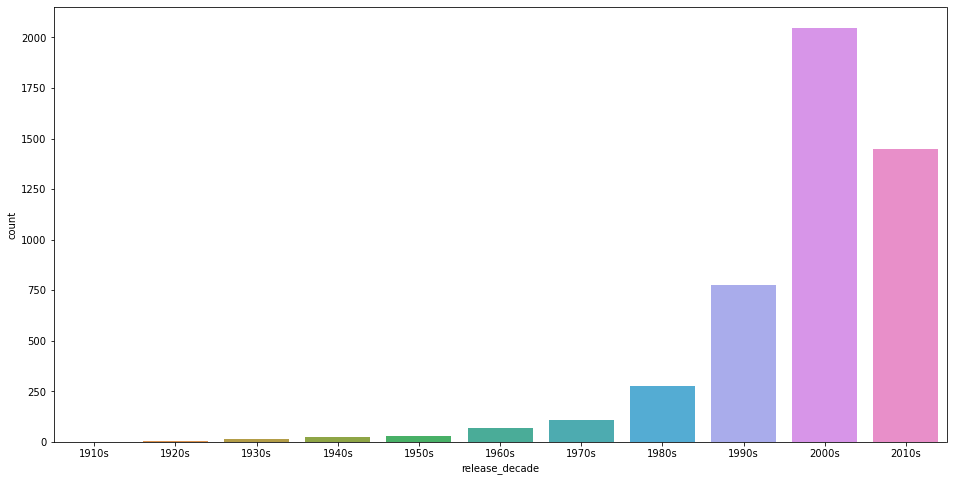

In [36]:
plt.figure(figsize=(16,8))
sns.countplot(data2.release_decade, order = ['1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s'])

We see that most of the movies in our dataset were released between the years 2000 and 2009 (both inclusive).

### Merging data sets for further analysis

In [37]:
data = data2.merge(data1, on='id')
data.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title_x,vote_average,vote_count,release_year,release_decade,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2000s,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,2000s,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,2015,2010s,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,2010s,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,2010s,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [38]:
data.shape

(4802, 24)

We see that two new title columns have been created : title_x and title_y since both data sets also had the title column in common.

This is what each row has:

In [39]:
data.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                                                             162.0
spoken_languages        [{"iso_639_1":

##### Let's check for duplicates

In [40]:
data[data.duplicated() == True]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title_x,vote_average,vote_count,release_year,release_decade,title_y,cast,crew


There are no rows which are fully duplicates. But let's check for specific duplicates based on the movie title since two movies could have the same name but just be different adaptations or productions.

This step is really important because we will be using the movie title to get recommendations later and we don't want any ambiguity here.

In [41]:
data[data.duplicated(subset='original_title', keep = False) == True]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title_x,vote_average,vote_count,release_year,release_decade,title_y,cast,crew
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096,1989,1980s,Batman,"[{""cast_id"": 5, ""character"": ""Jack Napier/The ...","[{""credit_id"": ""52fe422fc3a36847f800aa4b"", ""de..."
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",...,Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17,1980,1980s,Out of the Blue,"[{""cast_id"": 2, ""character"": ""Don"", ""credit_id...","[{""credit_id"": ""52fe47099251416c9106826f"", ""de..."
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",...,Released,The true story of a small town massacre,Out of the Blue,5.9,18,2006,2000s,Out of the Blue,"[{""cast_id"": 12, ""character"": ""Nick Harvey"", ""...","[{""credit_id"": ""52fe43c19251416c7501cceb"", ""de..."
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,1966,1960s,Batman,"[{""cast_id"": 17, ""character"": ""Batman / Bruce ...","[{""credit_id"": ""52fe4363c3a36847f80509a7"", ""de..."


We see that there are 2 movies whose titles are repeated : out of the blue and Batman.

Out of the blue first version was released in 1980 and second movie in 2006.
Batman first version was released in 1966 and second version in 1989.

To fix this, we will rename these movies as 'movie title' + ' ' + the year of release.

Since there are only 4 values that need to be changed, I will manually impute them. But I have also written a script that works (verified) in case there are more such values and manual edition is hard.

In [42]:
data['original_title'][1359] = data['original_title'][1359] + ' ' +  str(data.release_year[1359])
data['original_title'][3693] = data['original_title'][3693] + ' ' +  str(data.release_year[3693])
data['original_title'][3647] = data['original_title'][3647] + ' ' +  str(data.release_year[3647])
data['original_title'][4267] = data['original_title'][4267] + ' ' +  str(data.release_year[4267])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [43]:
data['original_title'][1359]

'Batman 1989'

In [44]:
data['original_title'][3693]

'Out of the Blue 2006'

In [45]:
data['original_title'][3647]

'Out of the Blue 1980'

In [47]:
#Run this script only if manual edition is hard

"""

for i in tqdm(range(len(data))):
    for j in range(len(data)):
        if i != j:
            if data.original_title[i] == data.original_title[j]:
                data.original_title[j] = data.original_title[j] + ' ' + str(data.release_year[j])
                data.original_title[i] = data.original_title[i] + ' ' + str(data.release_year[i])
                    
"""

"\n\nfor i in tqdm(range(len(data))):\n    for j in range(len(data)):\n        if i != j:\n            if data.original_title[i] == data.original_title[j]:\n                data.original_title[j] = data.original_title[j] + ' ' + str(data.release_year[j])\n                data.original_title[i] = data.original_title[i] + ' ' + str(data.release_year[i])\n                    \n"

In [48]:
data[data.duplicated(subset='original_title', keep = False) == True]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title_x,vote_average,vote_count,release_year,release_decade,title_y,cast,crew


### Demographic filtering 

In this type of filtering technique, we will use a weighted rating measure to find and recommend most popular movies.

IMDB's weighted rating (wr) is given as: 

            wr = (v/(v+m))*R + (m/(v+m))*C
            
where

        v is the number of votes for the movie;
        
        m is the minimum votes required to be listed in the chart;
        
        R is the average rating of the movie; And
        
        C is the mean vote across the whole report

We already have v(vote_count) and R(vote_average). Now we need to calculate C and m.

In [49]:
C= data['vote_average'].mean()
C

6.093440233236147

The mean rating for all the movies in our dataset is 6 out of 10.

To determine an appropriate value for m:

We will use 90th percentile as our cutoff. 
In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [50]:
m = data['vote_count'].quantile(0.9)
m

1839.2000000000044

We create a separata dataframe for all the movies which have votes more than 90% of the movies in the dataset. Let's call it top_movies.

In [51]:
top_movies = data.loc[data['vote_count'] >= m]
top_movies.shape

(481, 24)

We see that there are 481 really popular movies. Next, we calculate the weighted rating for each of these 481 movies. 

In [52]:
top_movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title_x,vote_average,vote_count,release_year,release_decade,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2000s,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,2000s,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,2015,2010s,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,2010s,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,2010s,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [53]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)


In [54]:
weighted_rating(top_movies)

0       7.050784
1       6.665992
2       6.239747
3       7.346842
4       6.096956
          ...   
4291    6.694138
4300    7.366615
4302    7.210774
4337    7.198357
4601    7.210930
Length: 481, dtype: float64

In [55]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
top_movies['score'] = top_movies.apply(weighted_rating, axis=1)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
top_movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,tagline,title_x,vote_average,vote_count,release_year,release_decade,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,Enter the World of Pandora.,Avatar,7.2,11800,2009,2000s,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050784
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,2000s,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665992
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,A Plan No One Escapes,Spectre,6.3,4466,2015,2010s,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239747
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,2010s,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346842
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"Lost in our world, found in another.",John Carter,6.1,2124,2012,2010s,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096956


In [57]:
#Sort movies based on score calculated above
top_movies = top_movies.sort_values('score', ascending=False)

#Print the top 10 movies
top_movies['original_title']

1881        The Shawshank Redemption
662                       Fight Club
65                   The Dark Knight
3232                    Pulp Fiction
96                         Inception
                    ...             
41                     Green Lantern
337           A Good Day to Die Hard
193                      After Earth
91      Independence Day: Resurgence
242                   Fantastic Four
Name: original_title, Length: 481, dtype: object

In [58]:
top_movies[['original_title','score', 'popularity']].head(10) 

,original_title,score,popularity
1881,The Shawshank Redemption,8.059333,136.747729
662,Fight Club,7.939332,146.757391
65,The Dark Knight,7.920083,187.322927
3232,Pulp Fiction,7.904731,121.463076
96,Inception,7.863298,167.583710
3337,The Godfather,7.851356,143.659698
95,Interstellar,7.809554,724.247784
809,Forrest Gump,7.803286,138.133331
329,The Lord of the Rings: The Return of the King,7.727346,123.630332
1990,The Empire Strikes Back,7.698020,78.517830


##### These are the top ten most popular and highest rated movies based on IMDB's weighted rating method. We might use this method to display movies under the "trending" column or else use this list for a new user of whom we don't have any information to calculate recommendations.

<Figure size 1152x576 with 0 Axes>

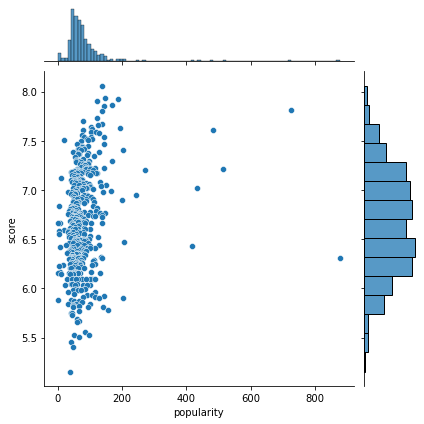

In [59]:
plt.figure(figsize=(16,8))
sns.jointplot(x = 'popularity', y = 'score' , data = top_movies[['original_title','score','popularity']])

#(x = 'popularity', y = 'score', data = top_movies[['original_title','score']].head(10))

In [60]:
len(top_movies[top_movies['popularity'] > 200])

11

We see that the 11 movies with popularity score higher than 200 made it to the top_movies list of 481 movies. However, having a higher popularity score (>200) does not seem to be correlated to having higher weighted rating / score.

Let's see what happens if we take a look at only those movies which have a popularity score lower than 200.

<Figure size 1152x576 with 0 Axes>

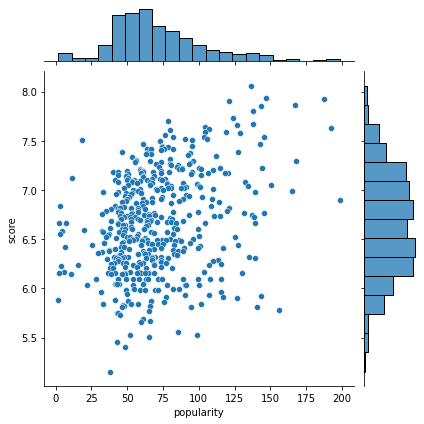

In [61]:
plt.figure(figsize=(16,8))
sns.jointplot(x = 'popularity', y = 'score' , data = top_movies[top_movies['popularity'] < 200])

Here there seems to be a clear correlation between populariy and score! 

## Content Based Filtering

In this type of filtering system the content of a movie (overview, cast, crew, keyword, tagline etc) is used to calculate its similarity with other movies. Then the movies that are most similar are recommended. 

In [62]:
data.overview.isna().sum()

3

In [63]:
data[data.overview.isna()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,status,tagline,title_x,vote_average,vote_count,release_year,release_decade,title_y,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",...,Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12,2015,2010s,Chiamatemi Francesco - Il Papa della gente,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",...,Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,2015,2010s,"To Be Frank, Sinatra at 100","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",292539,[],de,Food Chains,NaN,0.795698,[],[],...,Released,NaN,Food Chains,7.4,8,2014,2010s,Food Chains,[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de..."


Since there are only 3 rows missing the overview column value, I'm going to manually impute the values from IMDB's website by searching for each of the movie's overview.

In [64]:
data.overview[2656] = "A biopic of the rise of father Jorge Mario Bergoglio SJ from a teacher in a Jesuit High School in Argentina to archbishop and cardinal of Buenos Aires to Pope of the Roman Catholic Church. The story touches on his relation with his fellow Jesuits in Argentina and Europe, to his relation with laureate writer Jorge Luis Borges, Argentine dictator Jorge Rafael Videla, and archbishops Laghi (nuncio to Argentina) and Quarracino (cardinal of Buenos Aires), up to the moment where he is elected Pope in 2013."

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
data.overview[4140] = "The life of Frank Sinatra, as an actor and singer and the steps along the way that led him to become such an icon."

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
data.overview[4431] = "In the US, farm labor has always been one of the most difficult and poorly paid jobs and has relied on some of the nation's most vulnerable people. While the legal restrictions which kept people bound to farms, like slavery, have been abolished, exploitation still exists, ranging from wage theft to modern-day slavery. These days, this exploitation is perpetuated by the corporations at the top of the food chain: supermarkets. Their buying power has kept wages pitifully low and has created a scenario where desperately poor people are willing to put up with anything to keep their jobs."

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Content based filtering - Part 1

Overview based

In [67]:
data['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Next, we convert the word vector of each overview to numerical vectors. For this we will use Term Frequency-Inverse Document Frequency (TF-IDF).

In [68]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

We already filled the missing values manually. But if we had had more missing values and no way to get the data for it but also be unable to drop them, we would use fillna option to fill missing values with empty strings like this:

In [69]:
data['overview'] = data['overview'].fillna('')

In [70]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['overview'])
tfidf_matrix

<4802x20995 sparse matrix of type '<class 'numpy.float64'>'
	with 125892 stored elements in Compressed Sparse Row format>

In [71]:
tfidf_matrix.shape

(4802, 20995)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. I am going to use the cosine similarity method. Although this can be done with other metrics as well like Euclidean / Pearson correlation. 

In [72]:
#Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. 
# Compute the cosine similarity matrix
cosine_sim1 = linear_kernel(tfidf_matrix, tfidf_matrix)

In [73]:
cosine_sim1

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160058, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01487817, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160058, 0.01487817, ..., 1.        , 0.01609888,
        0.00701708],
       [0.        , 0.        , 0.        , ..., 0.01609888, 1.        ,
        0.01172444],
       [0.        , 0.        , 0.        , ..., 0.00701708, 0.01172444,
        1.        ]])

We see that similarity score is a matrix and each row corresponds to the movie in the dataset with the same index. So first, before we write the function for our recommendation system, we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [74]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(data.index, index=data['original_title']).drop_duplicates()

In [75]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4797
Newlyweds                                   4798
Signed, Sealed, Delivered                   4799
Shanghai Calling                            4800
My Date with Drew                           4801
Length: 4802, dtype: int64

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies

In [79]:
# Function that takes in movie title as input and outputs most similar movies
def get_content_based_recos(title, cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    #exclude 0 because that would be the same movie, with highest similarity score
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['original_title'].iloc[movie_indices]


In [80]:
get_content_based_recos('Newlyweds', cosine_sim = cosine_sim1)

3969                         Something Wicked
616                                     Ted 2
2689                       Our Family Wedding
1576                               Bride Wars
2290                             Just Married
504                   The Secret Life of Pets
866                        Bullet to the Head
4575                                Blue Ruin
3025    The Second Best Exotic Marigold Hotel
3155                              Melancholia
Name: original_title, dtype: object

In [81]:
get_content_based_recos('The Dark Knight Rises', cosine_sim = cosine_sim1)

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                Batman 1989
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

In [82]:
get_content_based_recos('Batman 1989', cosine_sim = cosine_sim1)

3                    The Dark Knight Rises
119                          Batman Begins
65                         The Dark Knight
210                         Batman & Robin
428                         Batman Returns
299                         Batman Forever
9       Batman v Superman: Dawn of Justice
3857                          Wicked Blood
1524                 George and the Dragon
3389                 Chairman of the Board
Name: original_title, dtype: object

### Content based filtering - part 2

Credits, genre and keywords based recommender

From the cast, crew and keywords features, we need to extract the three most important actors, the director and the keywords associated with that movie. Right now, our data is present in the form of stringed list of dictionaries. We need to convert it into a safe and usable structure.

In [83]:
# Parse the stringed features into their corresponding python objects
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(literal_eval)

Now the variables have become a list of dictionaries from a string of list of dictionaries.
Next we write functions to get the info we want like director's name, top 3 actors, 3 genres and 3 keywords.

In [84]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [85]:
# Returns the list top 3 elements or entire list; whichever is less.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []


Now we use these two functions and change the values in our data

In [86]:
# Define new director, cast, genres and keywords features that are in a suitable form.
data['director'] = data['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    data[feature] = data[feature].apply(get_list)

In [87]:
# Print the new features of the first 3 films
data[['original_title', 'cast', 'director', 'keywords', 'genres']].head()


,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


In [88]:
# Function to convert all strings to lower case and strip names of spaces
# Strpping names of spaces is important since we want to avoid calculating higher similarity between 2 people with the same first / last name

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [89]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    data[feature] = data[feature].apply(clean_data)


In [90]:
#See how data cleaning has changed the output
data[['original_title', 'cast', 'director', 'keywords', 'genres']].head()

,original_title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[dccomics, crimefighter, terrorist]","[action, crime, drama]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[basedonnovel, mars, medallion]","[action, adventure, sciencefiction]"


##### The next step is to combine all our key features for calculating similarity.

In [91]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
data['soup'] = data.apply(create_soup, axis=1)

In [92]:
data['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4797    unitedstates–mexicobarrier legs arms carlosgal...
4798     edwardburns kerrybishé marshadietlein edwardb...
4799    date loveatfirstsight narration ericmabius kri...
4800       danielhenney elizacoupe billpaxton danielhsia 
4801    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4802, dtype: object

Now we repeat what we did with previous recommendation system: create a vectorization of the features describing each movie.

However, this time we use the CountVectorizer() instead of TF-IDF. This is because we do not want to undermine the presence of an actor/director if he or she has acted or directed in relatively more movies. But it is okay (and kind of necessary) to do that when we were using the overview for building our recommendation system.

In [93]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['soup'])

Calculating Similarity

In [94]:
# Compute the Cosine Similarity matrix based on the count_matrix

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [95]:
cosine_sim2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [96]:
# Reset index of our main DataFrame and construct reverse mapping as before
data = data.reset_index()
indices = pd.Series(data.index, index=data['original_title'])

##### Use the get_content_based_recos function created before to get movie recommendations

In [97]:
get_content_based_recos('The Dark Knight Rises', cosine_sim = cosine_sim2)

65               The Dark Knight
119                Batman Begins
4637    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: original_title, dtype: object

In [98]:
#checking with previous set of recommendations for comparison:
get_content_based_recos('The Dark Knight Rises', cosine_sim = cosine_sim1)

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                Batman 1989
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

### Conclusion

The second content based recommender has been successful in capturing more information due to more metadata and has given us better recommendations since it is more likely that fans will like the movies of the same production house.

Both content based recommenders are better than the weighted score based recommendations.

However, none of these are personalised for each user and in that aspect, collaborative filtering does a much better job!